# Import Library

In [1]:
from sqlite3 import connect
import pickle
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# About Data

Data ini diperoleh dengan teknik *scrapping* pada website [**Traveloka**](www.traveloka.com/). Data ini berbentuk sqlite yang berisikan 2 tabel bernama `hotel_yogyakarta` dan `hotel_room_yogyakarta`.

Tujuan utama dalam 


## hotel_yogyakarta
Berikut detail column pada tabel `hotel_yogyakarta`.
**Dimensi (378, 12)**


- `id`: Unique id hotel
- `type`: Tipe penginapan
- `name`: Nama hotel
- `starRating`: Rating bintang hotel
- `builtYear`: Tahun dibuatnya hotel
- `description`: Deskripsi tentang hotel
- `link`: URL menuju halaman hotel di Traveloka
- `address`: Alamat hotel
- `city`: Kota hotel
- `image`: URL gambar hotel
- `facilities`: Daftar fasilitas pada hotel
- `nearestPointofInterests`:  Area populer / fasilitas umum disekitar hotel



## hotel_room_yogyakarta
Berikut detail column pada tabel `hotel_room_yogyakarta`.
**Dimensi (1199, 16)**

- `id`: Unique id hotel
- `hotelId`: Id hotel
- `roomType`: Tipe kamar hotel
- `description`: deskripsi kamar hotel
- `bedDescription`: deskripsi kasur kamar
- `size`: Ukuran kamar ($m^2$)
- `originalRate`: Harga kamar per malam
- `baseOccupancy`: Kapasitas kamar
- `maxChildAge`: Umur maksimal anak-anak
- `maxChildOccupancy`: Kapasitas kamar untuk anak-anak
- `numExtraBeds`: Jumlah kasur tambahan
- `isBreakfastIncluded`:  Fasilitas sarapan
- `isWifiIncluded`: Fasilitas WiFi
- `isRefundable`: Fasilitas refund
- `hasLivingRoom`: Fasilitas ruang keluarga
- `facilities`: Daftar fasilitas lainnya pada kamar

# Input Data

In [2]:
# SQLite3 connection

con = connect('..\Data\hotel-directories-ORI.sqlite3')
df_sql_hotel = pd.read_sql_query("SELECT * from hotel_yogyakarta", con=con)
df_sql_room = pd.read_sql_query("SELECT * from hotel_room_yogyakarta", con=con)
con.close()

- Buat koneksi ke database sqlite, lalu baca tabel `hotel_yogyakarta` dan `hotel_room_yogyakarta` menjadi dataframe pandas.

In [3]:
# Table columns

print('Kolom Tabel Hotel :')
print(df_sql_hotel.columns)
print("Total Baris :", df_sql_hotel.shape[0])
print("Total Kolom :", df_sql_hotel.shape[1])

print('-' * 50)

print('Kolom Tabel Kamar:')
print(df_sql_room.columns)
print("Total Baris :", df_sql_room.shape[0])
print("Total Kolom :", df_sql_room.shape[1])

Kolom Tabel Hotel :
Index(['id', 'type', 'name', 'starRating', 'builtYear', 'description', 'link',
       'address', 'city', 'image', 'facilities', 'nearestPointOfInterests'],
      dtype='object')
Total Baris : 378
Total Kolom : 12
--------------------------------------------------
Kolom Tabel Kamar:
Index(['id', 'hotelId', 'roomType', 'description', 'bedDescription', 'size',
       'originalRate', 'baseOccupancy', 'maxChildAge', 'maxChildOccupancy',
       'numExtraBeds', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
       'hasLivingRoom', 'facilities'],
      dtype='object')
Total Baris : 1199
Total Kolom : 16


In [4]:
print(f"Dimensi : {df_sql_hotel.shape}")
df_sql_hotel.sample(2)

Dimensi : (378, 12)


,id,type,name,starRating,builtYear,description,link,address,city,image,facilities,nearestPointOfInterests
230,9000000882888,Hotel,OYO 3935 Artha Ambarukmo Exclusive,0.0,None,<p><b>Lokasi</b><br>OYO 3935 Artha Ambarukmo E...,https://www.traveloka.com/id-id/hotel/detail?s...,"Jl Perumahan Kp. Ambarukmo, Catur tunggal, Yog...",Yogyakarta,https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[""WIFI_PUBLIC_AREA"",""ACCESSIBLE_PARKING"",""WIFI...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
287,9000001043014,Hotel,Capital O 91348 Keenan Living,0.0,None,<p><b>Lokasi</b><br>Capital O 91348 Keenan Liv...,https://www.traveloka.com/id-id/hotel/detail?s...,"1, Condong Catur, Condongcatur, Depok, Sleman,...",Yogyakarta,https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh2...,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""ACCESSIBLE_PARK...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."


In [5]:
print(f"Dimensi : {df_sql_room.shape}")
df_sql_room.sample(2)

Dimensi : (1199, 16)


,id,hotelId,roomType,description,bedDescription,size,originalRate,baseOccupancy,maxChildAge,maxChildOccupancy,numExtraBeds,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,facilities
52,1003657105,3000010007119,Space,<p>The largest Space room offers a more spacio...,None,36.0,"{""amount"":""1175207"",""currency"":""IDR"",""tax"":""24...",2,5,1,0,1,1,1,0,"[""AIR_CONDITIONING"",""COFFEE_TEA_MAKER"",""DESK"",..."
1102,1001390288,9000000325212,Suite Triple,None,None,18.0,"{""amount"":""234736"",""currency"":""IDR"",""tax"":""492...",1,10,1,0,0,1,1,0,"[""AIR_CONDITIONING"",""NON_SMOKING_ROOMS"",""PRIVA..."


In [6]:
# Fungsi menghitung unique value
def check_unique(df):
    count = 0
    for i in df.columns:
        if df[i].nunique() == 1:
            count += 1
            print(f'{i}: {df[i].nunique()}')
        else:
            print(f'{i}: {df[i].nunique()}')
    if count == 0:
        print('No columns with only one unique value')

- Gunakan fungsi `check_unique` untuk mengecek apakah terdapat data dengan unique value kurang dari 2. Jika ada, maka data tersebut tidak akan digunakan.

In [7]:
check_unique(df_sql_hotel)

id: 378
type: 1
name: 377
starRating: 8
builtYear: 38
description: 378
link: 378
address: 377
city: 1
image: 377
facilities: 372
nearestPointOfInterests: 375


In [8]:
check_unique(df_sql_room)

id: 1199
hotelId: 375
roomType: 423
description: 544
bedDescription: 0
size: 87
originalRate: 714
baseOccupancy: 9
maxChildAge: 13
maxChildOccupancy: 5
numExtraBeds: 1
isBreakfastIncluded: 2
isWifiIncluded: 2
isRefundable: 2
hasLivingRoom: 2
facilities: 600


- Nilai penghubung kedua tabel adalah `id` pada data **hotel**  dan `hotelId` pada data **kamar**.
- Terdapat beberapa beberapa kolom yang tidak digunakan pada analisis ini
    - **Hotel**: `name`, `description`, `link`, `address`, dan `image`.
    - **Kamar**: `id`, `roomType`, `description`, dan `bedDescription`.
- Terdapat beberapa kolom dengan total nilai unik kurang dari 2
    - **Hotel**: `type` dan `city`.
    - **Kamar**: `bedDescription` dan `numExtraBeds`
- Setelah dilakukan penghapusan kolom selanjutnya tabel akan di-*merge* menjadi satu dataframe.
- `starRating` memiliki 8 nilai unik, perlu di teliti lebih lanjut untuk detailnya.

## Menghapus Kolom

In [9]:
hotelDrop = ['name', 'description', 'link', 'address', 'image', 'type', 'city']
roomDrop = ['id', 'roomType', 'description', 'bedDescription', 'numExtraBeds']

df_hotel = df_sql_hotel.drop(hotelDrop, axis=1)
df_room = df_sql_room.drop(roomDrop, axis=1)

In [10]:
print('Total Hotel Table Data : ', df_hotel.shape[0])
print('Total Hotel Table Column : ', df_hotel.shape[1])
print('-' * 30)
print('Total Room Table Data : ', df_room.shape[0])
print('Total Room Table Column : ', df_room.shape[1])

Total Hotel Table Data :  378
Total Hotel Table Column :  5
------------------------------
Total Room Table Data :  1199
Total Room Table Column :  11


## Penggabungan Tabel

In [11]:
# Rename column
df_hotel.rename(columns={'id': 'hotelId'}, inplace=True)
df_hotel.rename(columns={'facilities': 'hotelFacilities'}, inplace=True)
df_room.rename(columns={'facilities': 'roomFacilities'}, inplace=True)

- Menyamakan nama `id` pada tabel **hotel** dan `hotelId` pada tabel **kamar**.
- Menambah prefix `hotel` dan `room` pada tiap kolom `facilities` masing-masing tabel.

In [12]:
# merge hotel dan room data
df = pd.merge(df_hotel, df_room, on='hotelId', how='inner')

# remove id column
df.drop(columns=['hotelId'], inplace=True)

# re arrange column
df = df[['originalRate', 'starRating', 'builtYear', 'size', 'baseOccupancy', 'maxChildAge',
         'maxChildOccupancy', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
         'hasLivingRoom', 'hotelFacilities', 'roomFacilities', 'nearestPointOfInterests']]

df

,originalRate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
0,"{""amount"":""1008264"",""currency"":""IDR"",""tax"":""21...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
1,"{""amount"":""1049587"",""currency"":""IDR"",""tax"":""22...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
2,"{""amount"":""1049587"",""currency"":""IDR"",""tax"":""22...",5.0,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
3,"{""amount"":""1842975"",""currency"":""IDR"",""tax"":""38...",5.0,2013,60.0,2,8,0,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
4,"{""amount"":""2396694"",""currency"":""IDR"",""tax"":""50...",5.0,2013,80.0,2,8,0,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,"{""amount"":""308540"",""currency"":""IDR"",""tax"":""647...",1.0,None,15.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1195,"{""amount"":""220385"",""currency"":""IDR"",""tax"":""462...",1.0,None,16.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1196,"{""amount"":""296425"",""currency"":""IDR"",""tax"":""622...",2.0,2013,25.0,2,10,1,0,1,1,0,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""SAFETY_DE...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""COFFEE_...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."
1197,"{""amount"":""994485"",""currency"":""IDR"",""tax"":""208...",2.0,2013,60.0,6,10,1,0,1,1,0,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""SAFETY_DE...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""COFFEE_...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."


- Dimensi pasca penggabungan adalah `(1199, 14)`
- Menghapus kolom `hotelId` karena sudah tidak diperlukan lagi.
- Mengubah urutan kolom untuk mempermudah analisis, target kolom berada di kiri dan kolom array berada di kanan.


## Original Rate/Target Processing

In [13]:
for i in range(0, 5):
    print(df.loc[i, 'originalRate'])

{"amount":"1008264","currency":"IDR","tax":"211736"}
{"amount":"1049587","currency":"IDR","tax":"220413"}
{"amount":"1049587","currency":"IDR","tax":"220413"}
{"amount":"1842975","currency":"IDR","tax":"387025"}
{"amount":"2396694","currency":"IDR","tax":"503306"}


- Data berbentuk `JSON` atau `Dictionary`, maka perlu diubah menjadi nilai harga dengan 1 nilai.
- Karena semua data menggunakan matauang `IDR`, maka `currency` tidak diperlukan.

In [14]:
# Extract the amount from originalRate using a lambda function
df['rate'] = df['originalRate'].apply(lambda x: json.loads(x)['amount'])
df['tax'] = df['originalRate'].apply(lambda x: json.loads(x)['tax'])
df = df.drop(columns=['originalRate'])

In [15]:
# check tipe data
print('Tipe data harga :', df['rate'].dtype)
print('Tipe data pajak :', df['tax'].dtype)

Tipe data harga : object
Tipe data pajak : object


In [16]:
# ubah tipe data
df['rate'] = df['rate'].astype('int')
df['tax'] = df['tax'].astype('int')

print('Tipe data harga :', df['rate'].dtype)
print('Tipe data pajak :', df['tax'].dtype)

Tipe data harga : int32
Tipe data pajak : int32


### Rasio Pajak

In [17]:
# create series for original rate
original_rate = df['rate']
# create series for tax
tax = df['tax']
# create dataframe for original rate, tax, and tax rate
df_rate = pd.DataFrame({'original_rate': original_rate, 'tax': tax})
df_rate['tax_rate'] = df_rate['tax'] / df_rate['original_rate'] * 100

df_rate

,original_rate,tax,tax_rate
0,1008264,211736,21.000056
1,1049587,220413,20.999974
2,1049587,220413,20.999974
3,1842975,387025,21.000014
4,2396694,503306,21.000011
...,...,...,...
1194,308540,64793,20.999870
1195,220385,46282,21.000522
1196,296425,62249,20.999916
1197,994485,208842,21.000015


Median pajak :  20.99999233666715
null / 0% pajak:  63
Pajak diantara 0 - 20%: 8
Rasio pajak diatas 20% : 1128


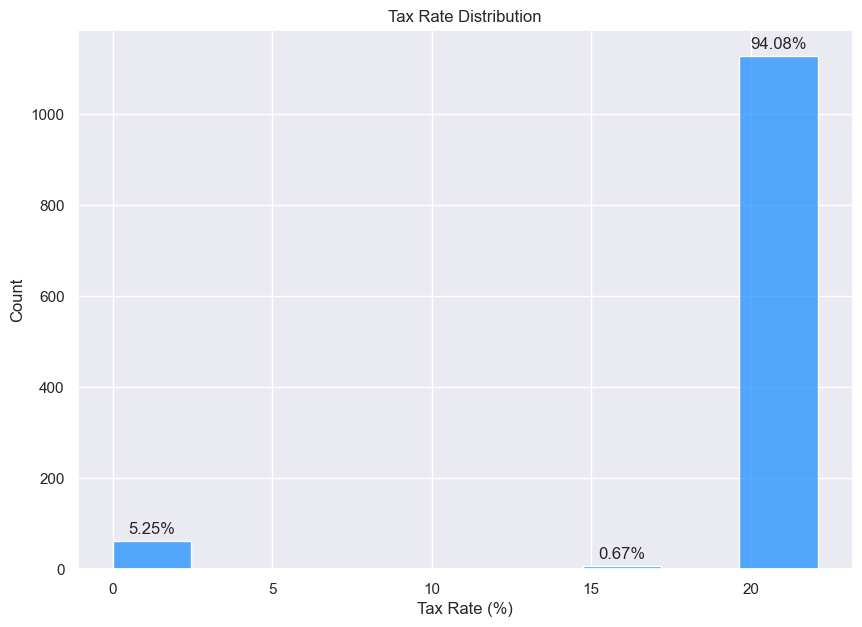

In [18]:
# count number of data with tax rate 20% and under 21%, also over 21%
count0 = 0
count_20 = 0
countBetween = 0
for i in range(len(df_rate['tax_rate'])):
    if df_rate['tax_rate'][i] < 20 and df_rate['tax_rate'][i] > 0:
        countBetween += 1
    elif df_rate['tax_rate'][i] >= 20:
        count_20 += 1
    elif df_rate['tax_rate'][i] == 0:
        count0 += 1
print('Median pajak : ', df_rate['tax_rate'].median())
print('null / 0% pajak: ', count0)
print('Pajak diantara 0 - 20%:', countBetween)
print('Rasio pajak diatas 20% :', count_20)


# plot for tax rate and give the total value on the top of the bar if the value is 0% it will not show
sns.set(rc={'figure.figsize': (10, 7)})
sns.set_style('darkgrid')
ax = sns.histplot(df_rate['tax_rate'], kde=False, color='dodgerblue', bins=9)
ax.set(xlabel='Tax Rate (%)', ylabel='Count')
ax.set_title('Tax Rate Distribution')
total = len(df_rate['tax_rate'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x()+p.get_width()/2.,
                height + 15,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
plt.show()

In [19]:
# Menghapus kolom pajak
df = df.drop(columns=['tax'])

In [20]:
# Mengubah target kolom menjadi di awal
df = df[['rate'] + [col for col in df.columns if col != 'rate']]
df.columns

Index(['rate', 'starRating', 'builtYear', 'size', 'baseOccupancy',
       'maxChildAge', 'maxChildOccupancy', 'isBreakfastIncluded',
       'isWifiIncluded', 'isRefundable', 'hasLivingRoom', 'hotelFacilities',
       'roomFacilities', 'nearestPointOfInterests'],
      dtype='object')

- Pajak hotel di Yogyakarta ada di kisaran `20-22%` dengan median `21%`
- Karena `94%` data memiliki pajak dikisaran tersebut maka nilai pajak dianggap 21%(*median*) secara keseluruhan.


# Validasi Data

## Pengecekan Rating Bintang


OriginalRate Distribution by starRating
starRating
0.0    332
3.0    240
4.0    204
2.0    160
1.0    153
5.0     92
2.5     12
3.5      6
Name: count, dtype: int64


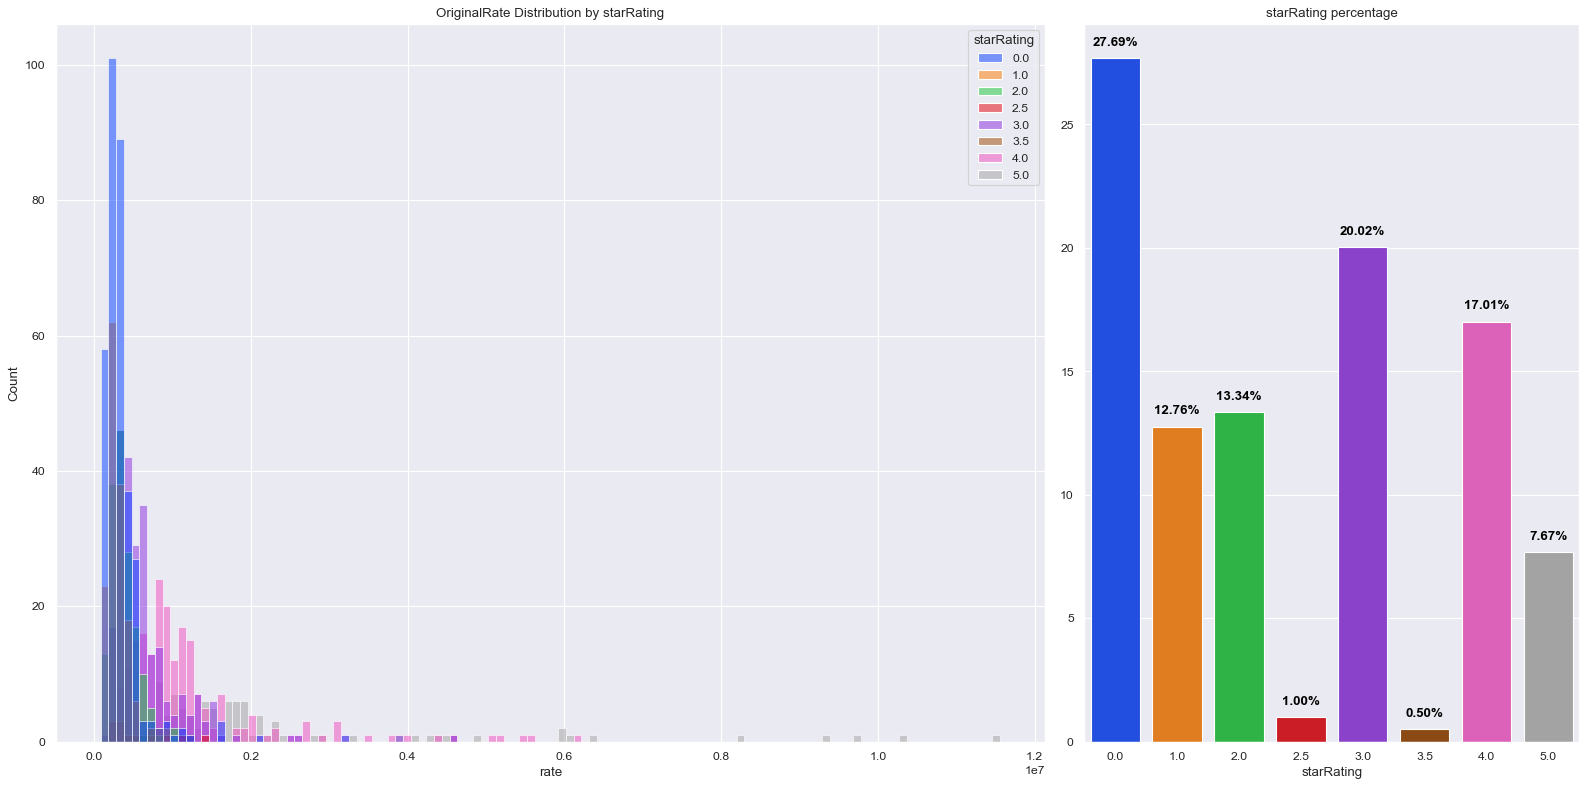

In [21]:
# starRating Distribution
value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i)
                         for i in value_percentage.index]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df, x="rate", hue='starRating', palette='bright',
             ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values,
            palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for container in ax[1].containers:
    for bar in container.patches:
        v = bar.get_height()
        bar_center = bar.get_x() + bar.get_width() / 2
        ax[1].text(bar_center, v + 0.5,
                   f'{v:.2f}%', color='black', fontweight='bold', ha='center')
fig.tight_layout()

- Rating bintang memiliki beberapa nilai dengan 0.5 (desimal), tetapi nilai tersebut hanya memiliki persentase jumlah data yang sedikit, maka dari itu rating tersebut dihilangkan angka desimalnya dari rating seharusnya.

In [22]:
# ubah starRating dengan angka bulat
df['starRating'] = df['starRating'].replace(2.5, 2)
df['starRating'] = df['starRating'].replace(3.5, 3)

OriginalRate Distribution by starRating
starRating
0.0    332
3.0    246
4.0    204
2.0    172
1.0    153
5.0     92
Name: count, dtype: int64


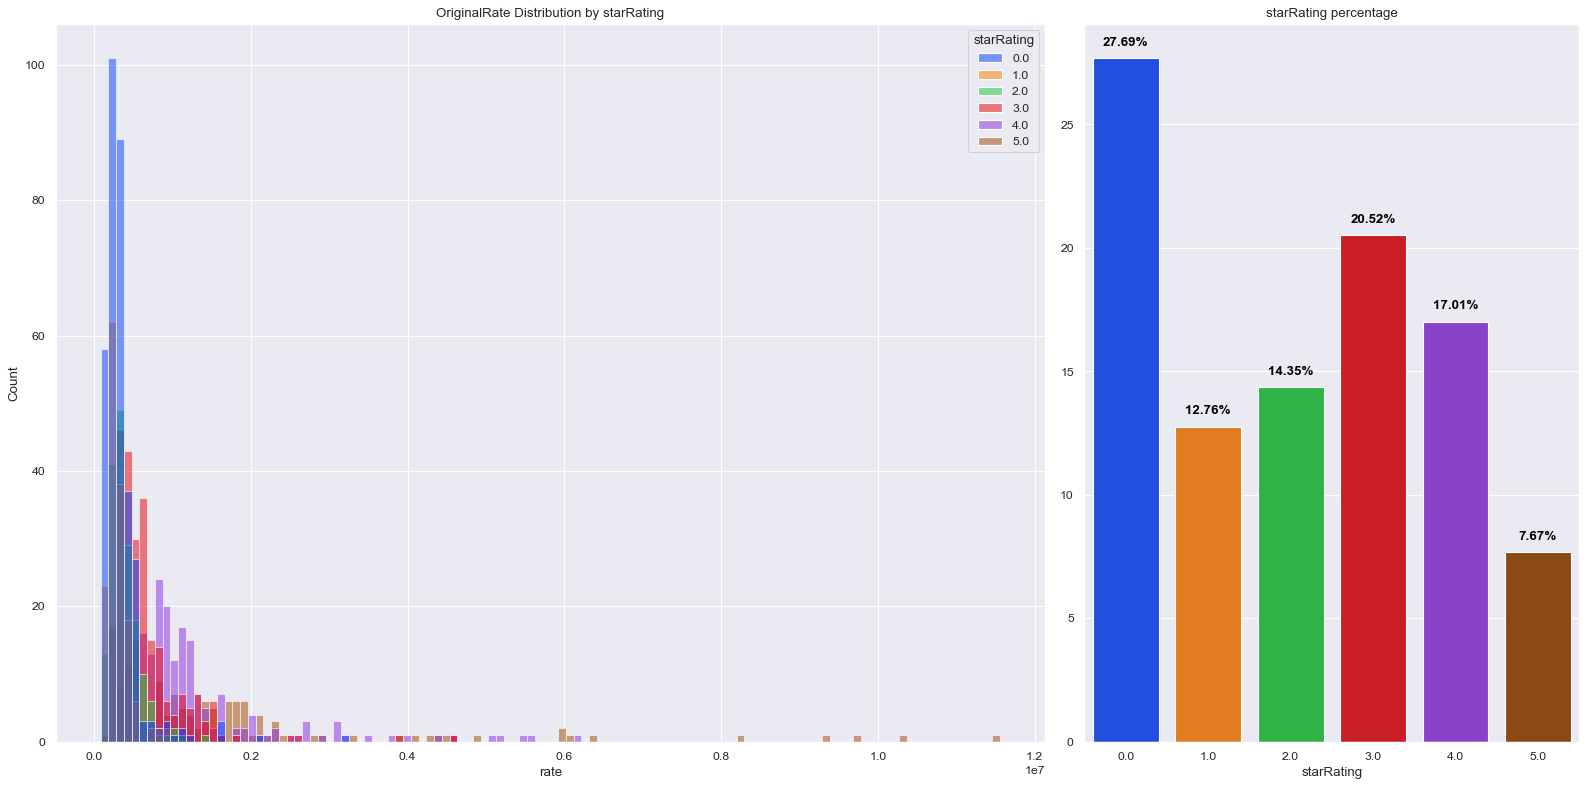

In [23]:
# starRating Distribution
value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i)
                         for i in value_percentage.index]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df, x="rate", hue='starRating', palette='bright',
             ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values,
            palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for container in ax[1].containers:
    for bar in container.patches:
        v = bar.get_height()
        bar_center = bar.get_x() + bar.get_width() / 2
        ax[1].text(bar_center, v + 0.5,
                   f'{v:.2f}%', color='black', fontweight='bold', ha='center')
fig.tight_layout()

- Persentase persebaran data tiap rating bintang sudah lebih baik setelah dilakukan pengubahan nilai rating bintang.
- Terlihat pada plot yang `kiri` bahwa terdapat ekor yang sangat panjang, ini menunjukkan adanya outlier pada kolom harga(`rate`)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rate                     1199 non-null   int32  
 1   starRating               1199 non-null   float64
 2   builtYear                878 non-null    object 
 3   size                     1064 non-null   object 
 4   baseOccupancy            1199 non-null   int64  
 5   maxChildAge              1199 non-null   int64  
 6   maxChildOccupancy        1199 non-null   int64  
 7   isBreakfastIncluded      1199 non-null   int64  
 8   isWifiIncluded           1199 non-null   int64  
 9   isRefundable             1199 non-null   int64  
 10  hasLivingRoom            1199 non-null   int64  
 11  hotelFacilities          1199 non-null   object 
 12  roomFacilities           1199 non-null   object 
 13  nearestPointOfInterests  1199 non-null   object 
dtypes: float64(1), int32(1),

- Kolom `starRating` masih bertipe data `float` walau sudah tidak memiliki angka desimal, maka perlu akan menjadi `int` 
- Kolom `builtYear` harus diganti ke tipe data `int`
- Kolom `size` harus diganti ke tipe data `float` (tipe data dasar dari tabel sqlite adalah `float`)
- Terdapat nilai `null` pada kolom `builtYear` dan `size` yang harus ditangani 


In [25]:
df['starRating'] = df['starRating'].astype('int')
print('Tipe data starRating :', df['starRating'].dtype)

Tipe data starRating : int32


## Data Cleaning

### Check duplicate

In [26]:
# show index who has duplicate value
print('Total duplicated row = ', df.duplicated().sum())
# print duplicated data list index 1
df[df.duplicated(keep=False)]

Total duplicated row =  89


,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
1,1049587,5,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
2,1049587,5,2013,40.0,2,8,1,1,1,0,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...","[{""landmarkId"":""900000001343"",""geoId"":null,""na..."
6,6000000,5,2012,105.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""COF...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
7,6000000,5,2012,105.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""COF...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
8,1933333,5,2012,40.0,2,6,2,1,1,1,0,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""RESTAURAN...","[""AIR_CONDITIONING"",""BATHROBES"",""COMPLIMENTARY...","[{""landmarkId"":""91607408097208"",""geoId"":null,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,141273,0,None,None,2,5,0,0,0,1,0,"[""HAS_24_HOUR_FRONT_DESK""]",[],"[{""landmarkId"":""91607407537252"",""geoId"":null,""..."
1173,550964,0,None,None,2,5,0,0,0,1,0,[],[],"[{""landmarkId"":""91607407802715"",""geoId"":null,""..."
1174,550964,0,None,None,2,5,0,0,0,1,0,[],[],"[{""landmarkId"":""91607407802715"",""geoId"":null,""..."
1189,413223,1,None,9.0,2,10,0,0,1,1,0,"[""WIFI_PUBLIC_AREA"",""ACCESS_FRIENDLY"",""ACCESSI...","[""AIR_CONDITIONING"",""DESK"",""NON_SMOKING_ROOMS""...","[{""landmarkId"":""91607407537252"",""geoId"":null,""..."


In [27]:
# drop duplicate data
df = df.drop_duplicates(keep='first')
df.shape

(1110, 14)

- Dengan menggunakan parameter `keep = 'first'` maka data yang duplikat akan dihapus kecuali data pertama yang muncul.

### Check outlier

In [28]:
# Jumlah baris data
jumlah_baris_ori = df.shape[0]

In [29]:
# crate dataframe for null value
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_value'])
df_null['null_value_percentage'] = df_null['null_value'] / len(df) * 100
df_null

,null_value,null_value_percentage
rate,0,0.000000
starRating,0,0.000000
builtYear,305,27.477477
size,121,10.900901
baseOccupancy,0,0.000000
maxChildAge,0,0.000000
maxChildOccupancy,0,0.000000
isBreakfastIncluded,0,0.000000
isWifiIncluded,0,0.000000
isRefundable,0,0.000000


- Terdapat 2 data yang memiliki nilai `null` dengan persentase yang cukup tinggi, yaitu kolom `builtYear` dan `size`. Oleh karena itu data tersebut akan diubah dengan nilai median per rating hotel.

In [30]:
# create new dataframe for null value rows
df_null_rows = df[df.isnull().any(axis=1)]
df_null_rows

,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,hotelFacilities,roomFacilities,nearestPointOfInterests
41,716253,4,None,28.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
42,826447,4,None,28.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
43,936639,4,None,35.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
44,1212121,4,None,28.0,2,5,0,0,1,0,0,"[""COFFEE_SHOP"",""ELEVATOR"",""RESTAURANT_FOR_BREA...","[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...","[{""landmarkId"":""91510822038476"",""geoId"":null,""..."
60,846281,4,2018,None,1,0,0,0,1,0,0,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[""TOWELS_PROVIDED"",""NON_SMOKING_ROOMS"",""LINENS...","[{""landmarkId"":""91575379594159"",""geoId"":null,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,187328,1,None,12.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""DESK"",""FAN"",""PRIVATE_BATHROOM"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1193,440772,1,None,28.0,4,12,2,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""BATHTUB"",""DESK"",""TELEVISI...","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1194,308540,1,None,15.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."
1195,220385,1,None,16.0,2,12,1,0,1,0,0,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""LAN_INTERNET_AC...","[""AIR_CONDITIONING"",""DESK"",""SHOWER"",""TELEVISION""]","[{""landmarkId"":""900000001117"",""geoId"":null,""na..."


In [31]:
# ubah sementara null value menjadi 0
df['builtYear'] = df['builtYear'].fillna(0)
df['size'] = df['size'].fillna(0)

# ubah tipe data
df['builtYear'] = df['builtYear'].astype('int32')
df['size'] = df['size'].astype('float')

print('Tipe data builtYear :', df['builtYear'].dtype)
print('Tipe data size :', df['size'].dtype)

Tipe data builtYear : int32
Tipe data size : float64


> **Note**: Kolom yang memiliki nilai `null` akan membuat tipe data menjadi `object`, maka dari itu pada penelitian ini akan diisi dengan nilai `0` terlebih dahulu, kemudian kolom tersebut diubah tipe datanya

In [32]:
# ubah nilai 0 pada kolom builtYear menjadi median tiap starRating
for i in df['starRating'].unique():
    df.loc[(df['starRating'] == i) & (df['builtYear'] == 0),
           'builtYear'] = df[df['starRating'] == i]['builtYear'].median()

# ubah nilai 0 pada kolom size menjadi median tiap starRating
for i in df['starRating'].unique():
    df.loc[(df['starRating'] == i) & (df['size'] == 0),
           'size'] = df[df['starRating'] == i]['size'].median()
    

In [33]:
# crate dataframe for null value
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_value'])
df_null['null_value_percentage'] = df_null['null_value'] / len(df) * 100
df_null

,null_value,null_value_percentage
rate,0,0.0
starRating,0,0.0
builtYear,0,0.0
size,0,0.0
baseOccupancy,0,0.0
maxChildAge,0,0.0
maxChildOccupancy,0,0.0
isBreakfastIncluded,0,0.0
isWifiIncluded,0,0.0
isRefundable,0,0.0


- Data sudah tidak memiliki nilai `null`

## Statistik Deskriptif

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 0 to 1198
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rate                     1110 non-null   int32  
 1   starRating               1110 non-null   int32  
 2   builtYear                1110 non-null   int32  
 3   size                     1110 non-null   float64
 4   baseOccupancy            1110 non-null   int64  
 5   maxChildAge              1110 non-null   int64  
 6   maxChildOccupancy        1110 non-null   int64  
 7   isBreakfastIncluded      1110 non-null   int64  
 8   isWifiIncluded           1110 non-null   int64  
 9   isRefundable             1110 non-null   int64  
 10  hasLivingRoom            1110 non-null   int64  
 11  hotelFacilities          1110 non-null   object 
 12  roomFacilities           1110 non-null   object 
 13  nearestPointOfInterests  1110 non-null   object 
dtypes: float64(1), int32(3), int6

In [35]:
df.describe()

,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
count,1.110000e+03,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000,1110.000000
mean,7.118771e+05,2.042342,1993.248649,25.430982,2.080180,6.528829,0.747748,0.322523,0.896396,0.457658,0.020721
std,9.971952e+05,1.643362,122.853595,20.378749,0.804554,3.013432,0.570834,0.467652,0.304883,0.498428,0.142512
min,8.264500e+04,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.708675e+05,0.000000,2000.000000,16.000000,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.081860e+05,2.000000,2012.000000,21.000000,2.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,7.816760e+05,3.000000,2015.000000,29.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.156198e+07,5.000000,2022.000000,350.000000,16.000000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000


- Pada kolom `builtYear` terdapat nilai minimum `1` yang tidak mungkin terjadi, maka data tersebut akan dihapus. 
- nilai median pada `rate` dan `size` terpaut cukup jauh dengan nilai maximum, ini menunjukkan adanya outlier pada kolom `rate`.

### Built Year Data handling

In [36]:
# Cek nilai unique pada kolom builtYear dibawah 2000
print('Nilai unique builtYear dibawah 2000 :')
print(df[df['builtYear'] < 2000]['builtYear'].unique())

print('Nilai unique bulitYear dibawah 1900 :')
print(df[df['builtYear'] < 1900]['builtYear'].unique())

Nilai unique builtYear dibawah 2000 :
[1997 1995 1964 1990 1992 1937    1 1994 1977 1993 1996 1978 1989 1986
 1998]
Nilai unique bulitYear dibawah 1900 :
[1]


- Terdapat data yang memiliki nilai `builtYear` yang tidak mungkin terjadi, maka data tersebut akan dihapus.
- Tidak terdapat hotel dibawah tahun 1900, maka dari itu data yang disimpan adalah data diatas tahun 1900.


In [37]:
# menghapus baris yang memiliki nilai dibawah 1900 pada kolom builtYear
df = df[df['builtYear'] > 1900]

# Cek nilai unique pada kolom builtYear dibawah 2000
print('Nilai unique builtYear dibawah 2000 :')
print(df[df['builtYear'] < 2000]['builtYear'].unique())

Nilai unique builtYear dibawah 2000 :
[1997 1995 1964 1990 1992 1937 1994 1977 1993 1996 1978 1989 1986 1998]


### Rate Data handling

Harga
maximum value : 11561983
minimum value : 82645
skew value : 5.33


<Figure size 1600x800 with 0 Axes>

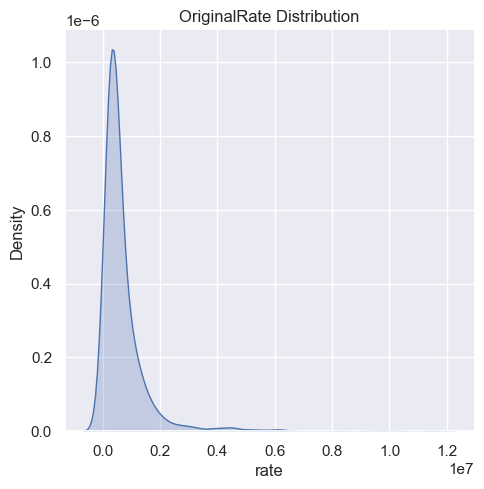

In [38]:
# Statistik Harga
print('Harga')
print(f'maximum value : {df.rate.max()}')
print(f'minimum value : {df.rate.min()}')
print(f'skew value : {round(df.rate.skew(), 2)}')

# Distribusi harga
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df, x="rate", kind="kde", fill=True).set(
    title='OriginalRate Distribution')
plt.show()

- Kolom `rate` memiliki nilai *skew* yang cukup tinggi, selain itu dari plot terlihat memiliki ekor yang cukup panjang. Ini menunjukkan adanya outlier pada kolom `rate`.
- Penghapusan outlier dilakukan dengan menggunakan metode IQR.
>Untuk penjelasan lebih lanjut mengenai *skew* dapat dilihat [disini](https://accounting.binus.ac.id/2021/08/12/memahami-nilai-skewness-ukuran-kemiringan-dalam-statistik-deskriptif/)

In [39]:
# Hitung outlier pada kolom rate
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

print('Batas bawah :', Q1 - (1.5 * IQR))
print('Batas atas :', Q3 + (1.5 * IQR))

# Hitung jumlah outlier
total_outlier = len(df[(df['rate'] < (Q1 - (1.5 * IQR))) | (df['rate'] > (Q3 + (1.5 * IQR)))])
print('Jumlah outlier :', total_outlier)

Batas bawah : -502673.875
Batas atas : 1556801.125
Jumlah outlier : 91


- Terdapat 91 data outlier pada kolom `rate`.

In [40]:
# Hapus outlier
df = df[(df['rate'] > (Q1 - (1.5 * IQR))) & (df['rate'] < (Q3 + (1.5 * IQR)))]
df.describe()

,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
count,1.015000e+03,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,4.900464e+05,1.858128,2000.077833,22.072798,2.066010,6.599015,0.753695,0.284729,0.887685,0.456158,0.016749
std,3.242374e+05,1.554268,27.601540,9.015316,0.645556,2.969237,0.567377,0.451508,0.315910,0.498320,0.128392
min,8.264500e+04,0.000000,1937.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589530e+05,0.000000,2001.000000,16.000000,2.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.719010e+05,2.000000,2012.000000,20.000000,2.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,6.118455e+05,3.000000,2015.000000,26.500000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.534866e+06,5.000000,2022.000000,72.000000,6.000000,12.000000,4.000000,1.000000,1.000000,1.000000,1.000000


- Nilai maksimum sudah cukup menurun setelah dilakukan penghapusan outlier.
- Nilai maksimum pada kolom `size` juga ikut menurun.

Harga
maximum value : 1534866
minimum value : 82645
skew value : 1.31


<Figure size 1600x800 with 0 Axes>

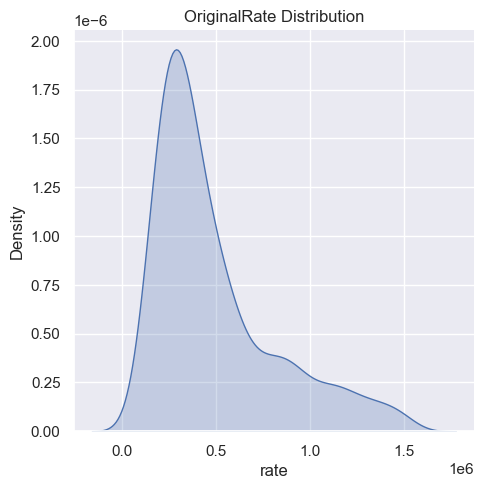

In [41]:
# Statistik Harga
print('Harga')
print(f'maximum value : {df.rate.max()}')
print(f'minimum value : {df.rate.min()}')
print(f'skew value : {round(df.rate.skew(), 2)}')

# Distribusi harga
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df, x="rate", kind="kde", fill=True).set(
    title='OriginalRate Distribution')
plt.show()

- Nilai skew pada kolom `rate` sudah menjadi lebih baik setelah dilakukan penghapusan outlier.

### Size Data handling

Size
maximum value : 72.0
minimum value : 3.0
skew value : 1.2163013252656778


<Figure size 1600x800 with 0 Axes>

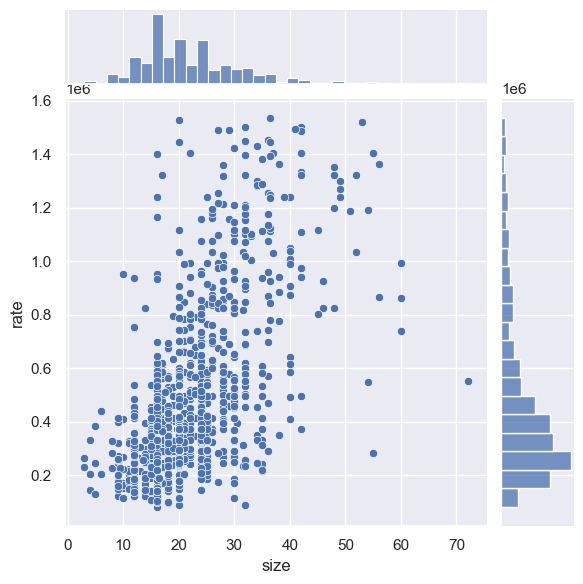

In [42]:
# Statistik Size
print('Size')
print('maximum value : {}'.format(df['size'].max()))
print('minimum value : {}'.format(df['size'].min()))
print('skew value : {}'.format(df['size'].skew()))

# Distribusi size
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='rate')
plt.show()

- Nilai skew sudah sangat mendekati angka 1, ini menunjukkan bahwa distribusi data sudah sangat baik.

In [43]:
# Hasil data cleaning
print('Total baris data awal :', jumlah_baris_ori)
print('Total baris data yang dihapus :', jumlah_baris_ori - df.shape[0])
print('Total baris data setelah cleaning :', df.shape[0])

Total baris data awal : 1110
Total baris data yang dihapus : 95
Total baris data setelah cleaning : 1015


In [44]:
df.shape

(1015, 14)

In [45]:
df.isnull().sum()

rate                       0
starRating                 0
builtYear                  0
size                       0
baseOccupancy              0
maxChildAge                0
maxChildOccupancy          0
isBreakfastIncluded        0
isWifiIncluded             0
isRefundable               0
hasLivingRoom              0
hotelFacilities            0
roomFacilities             0
nearestPointOfInterests    0
dtype: int64

# Encoding Data



In [46]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rate                     1015 non-null   int32  
 1   starRating               1015 non-null   int32  
 2   builtYear                1015 non-null   int32  
 3   size                     1015 non-null   float64
 4   baseOccupancy            1015 non-null   int64  
 5   maxChildAge              1015 non-null   int64  
 6   maxChildOccupancy        1015 non-null   int64  
 7   isBreakfastIncluded      1015 non-null   int64  
 8   isWifiIncluded           1015 non-null   int64  
 9   isRefundable             1015 non-null   int64  
 10  hasLivingRoom            1015 non-null   int64  
 11  hotelFacilities          1015 non-null   object 
 12  roomFacilities           1015 non-null   object 
 13  nearestPointOfInterests  1015 non-null   object 
dtypes: float64(1), int32(3),

- Kolom `hotelfacilities`, `roomfacilities`, dan `nearestPointofInterests` merupakan sebuah fitur dengan multi label. Oleh karena itu data tersebut akan dilakukan *`multi-hot encoding`*.
- Proses tersebut akan dilakukan dengan library `sklearn.preprocessing.MultiLabelBinarizer`

> Untuk penjelasan lebih lanjut tentang *`multi-label`* dan *`multi-class`* dapat dilihat [disini](https://www.kdnuggets.com/2023/01/encoding-categorical-features-multilabelbinarizer.html)

### Chek data format

In [47]:
df['hotelFacilities'].head(2)

0    ["CARPARK","COFFEE_SHOP","ELEVATOR","RESTAURAN...
1    ["CARPARK","COFFEE_SHOP","ELEVATOR","RESTAURAN...
Name: hotelFacilities, dtype: object

In [48]:
df['roomFacilities'].head(2)

0    ["AIR_CONDITIONING","BALCONY_TERRACE","BATHROB...
1    ["AIR_CONDITIONING","BALCONY_TERRACE","BATHROB...
Name: roomFacilities, dtype: object

In [49]:
df['nearestPointOfInterests'].head(2)

0    [{"landmarkId":"900000001343","geoId":null,"na...
1    [{"landmarkId":"900000001343","geoId":null,"na...
Name: nearestPointOfInterests, dtype: object

- `roomfacilities` dan `hotelFacilities` memiliki format yang sama, yaitu `list` yang berisi `string`.
- `nearestPointofInterests` memiliki format yang berbeda, yaitu `list` yang berisi `dictionary`/`json` yang berisi `string` dan `float`.

### Data processing

In [50]:
mlb = MultiLabelBinarizer()

- Daftar kolom hasil encoding akan diexport menjadi file `pkl` yang akan digunakan pada aplikasi streamlit.

In [51]:
# reformat kolom hotelFacilities
df['hotelFacilities'] = df['hotelFacilities'].apply(eval)

# multi label binarizer untuk kolom hotelFacilities dengan preifx Hotel_
hotel_facilities = pd.DataFrame(mlb.fit_transform(
    df['hotelFacilities']), columns=[f'Hotel_{col}' for col in mlb.classes_])

hotelNewCol = hotel_facilities.shape[1]
print('Jumlah kolom :', hotel_facilities.shape[1])

# export hotel_facilities with pickle
hotelFacilities = hotel_facilities.columns.tolist()
with open('../Data/Variable/hotelFacilities.pkl', 'wb') as f:
    pickle.dump(hotelFacilities, f)
    
hotel_facilities.head(2)

Jumlah kolom : 223


,Hotel_ACCESSIBILITY_EQUIPMENT,Hotel_ACCESSIBLE_BATHROOM,Hotel_ACCESSIBLE_PARKING,Hotel_ACCESSIBLE_PATH_OF_TRAVEL,Hotel_ACCESS_FRIENDLY,Hotel_AEROBICS,Hotel_AIRPORT_TRANSFER,Hotel_AIRPORT_TRANSFER_SURCHARGE,Hotel_AIR_CONDITIONING,Hotel_AIR_CONDITIONING_IN_RESTAURANT,...,Hotel_VOLLEYBALL,Hotel_WATERSLIDE,Hotel_WATER_SPORT,Hotel_WEDDING_SERVICE,Hotel_WHEELCHAIR_ACCESSIBLE,Hotel_WIFI_FREE,Hotel_WIFI_PUBLIC_AREA,Hotel_WIFI_PUBLIC_AREA_SURCHARGE,Hotel_WIFI_SURCHARGE,Hotel_WINERY
0,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,0


In [52]:
# reformat kolom roomFacilities
df['roomFacilities'] = df['roomFacilities'].apply(eval)

# multi label binarizer untuk kolom roomFacilities dengan preifx Room_
room_facilities = pd.DataFrame(mlb.fit_transform(df['roomFacilities']), columns=[
                               f'Room_{col}' for col in mlb.classes_])

roomNewCol = room_facilities.shape[1]
print('Jumlah kolom :', roomNewCol)

# export room_facilities with pickle
roomFacilities = room_facilities.columns.tolist()
with open('../Data/Variable/roomFacilities.pkl', 'wb') as f:
    pickle.dump(roomFacilities, f)

room_facilities.head(2)

Jumlah kolom : 70


,Room_AIR_CONDITIONING,Room_BALCONY,Room_BALCONY_TERRACE,Room_BATHROBES,Room_BATHTUB,Room_BLACKOUT_CURTAINS,Room_BLACKOUT_DRAPES_CURTAINS,Room_CLOTHES_DRYER,Room_COFFEE_TEA_MAKER,Room_COMPLIMENTARY_BOTTLED_WATER,...,Room_SLIPPERS,Room_SOUNDPROOFED_ROOMS,Room_TELEVISION,Room_TELEVISION_LCD_PLASMA_SCREEN,Room_TOILETRIES,Room_TOWELS_PROVIDED,Room_TURNDOWN_SERVICE,Room_TWENTY_FOUR_HOUR_ROOM_SERVICE,Room_WHEELCHAIR_ACCESSIBLE,Room_WIFI_SURCHARGE
0,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [53]:
# reformat kolom nearestPointOfInterests
df['nearestPointOfInterests'] = df['nearestPointOfInterests'].apply(
    lambda x: [item['landmarkType'] for item in json.loads(x)])

# multi label binarizer untuk kolom nearestPointOfInterests dengan preifx Point_
pointOfInterests = pd.DataFrame(mlb.fit_transform(
    df['nearestPointOfInterests']), columns=[f'Point_{col}' for col in mlb.classes_])

pointNewCol = pointOfInterests.shape[1]
print('Jumlah kolom :', pointNewCol)

# export pointOfInterests with pickle
pointInterests = pointOfInterests.columns.tolist()
with open('../Data/Variable/pointInterests.pkl', 'wb') as f:
    pickle.dump(pointInterests, f)

pointOfInterests.head(2)

Jumlah kolom : 15


,Point_AIRPORT,Point_ATTRACTION,Point_BEACH,Point_HOSPITAL,Point_MONUMENT,Point_MUSEUM,Point_OFFICIAL_BUILDING,Point_OTHERS,Point_PLACE_OF_WORSHIP,Point_RESTAURANT,Point_SCHOOL,Point_SHOPPING_AREA,Point_STORE,Point_TERMINAL,Point_TRAIN_STATION
0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


#### Menghubungkan dataframe

In [54]:
# Total kolom encoding
totalNewCol = hotelNewCol + roomNewCol + pointNewCol
print('Total kolom encoding :', totalNewCol)

Total kolom encoding : 308


In [55]:
# menghapus kolom hotelFacilities, roomFacilities, dan nearestPointOfInterests
df = df.drop(columns=['hotelFacilities', 'roomFacilities', 'nearestPointOfInterests'])

print('df shape :', df.shape)
print('hotel_facilities shape :', hotel_facilities.shape)
print('room_facilities shape :', room_facilities.shape)
print('pointOfInterests shape :', pointOfInterests.shape)

df = pd.concat([df, hotel_facilities, room_facilities,
               pointOfInterests], axis=1)
df.head()


df shape : (1015, 11)
hotel_facilities shape : (1015, 223)
room_facilities shape : (1015, 70)
pointOfInterests shape : (1015, 15)


,rate,starRating,builtYear,size,baseOccupancy,maxChildAge,maxChildOccupancy,isBreakfastIncluded,isWifiIncluded,isRefundable,...,Point_MUSEUM,Point_OFFICIAL_BUILDING,Point_OTHERS,Point_PLACE_OF_WORSHIP,Point_RESTAURANT,Point_SCHOOL,Point_SHOPPING_AREA,Point_STORE,Point_TERMINAL,Point_TRAIN_STATION
0,1008264,5,2013,40.0,2,8,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1,1049587,5,2013,40.0,2,8,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
2,1521212,4,2013,53.0,2,5,1,1,1,1,...,1,0,0,0,1,0,0,1,0,0
3,696969,4,2013,24.0,2,5,1,0,1,1,...,1,0,0,0,1,0,0,1,0,0
4,927273,4,2013,28.0,2,5,1,1,1,1,...,1,0,0,0,1,0,0,1,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Columns: 319 entries, rate to Point_TRAIN_STATION
dtypes: float64(1), int32(311), int64(7)
memory usage: 1.3 MB


# Export dataframe ke csv

In [57]:
# export data to csv
df.to_csv('..\Data\kamar-hotel-yogyakarta.csv', index=False)

In [58]:
col = df.columns
# export col with pickle
with open('../Data/Variable/col.pkl', 'wb') as f:
    pickle.dump(col, f)

In [62]:
print(col)

Index(['rate', 'starRating', 'builtYear', 'size', 'baseOccupancy',
       'maxChildAge', 'maxChildOccupancy', 'isBreakfastIncluded',
       'isWifiIncluded', 'isRefundable',
       ...
       'Point_MUSEUM', 'Point_OFFICIAL_BUILDING', 'Point_OTHERS',
       'Point_PLACE_OF_WORSHIP', 'Point_RESTAURANT', 'Point_SCHOOL',
       'Point_SHOPPING_AREA', 'Point_STORE', 'Point_TERMINAL',
       'Point_TRAIN_STATION'],
      dtype='object', length=319)


# Data Analisis

starRating
0    305
3    225
2    161
1    147
4    143
5     34
Name: count, dtype: int64


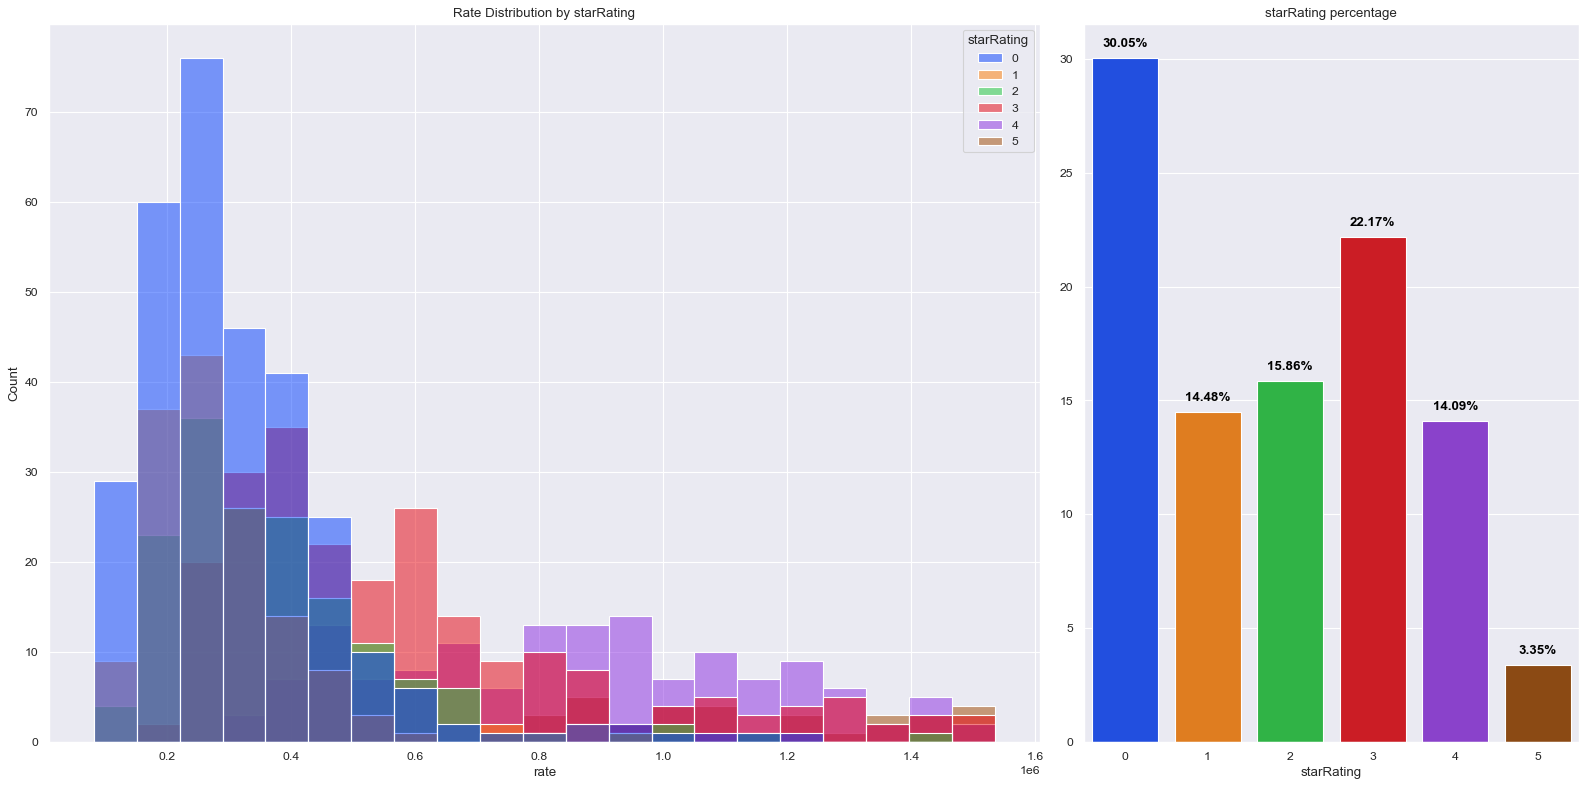

In [59]:
value = df.starRating.value_counts()
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i)
                         for i in range(len(value_percentage))]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df, x="rate", hue='starRating', palette='bright',
             ax=ax[0]).set(title='Rate Distribution by starRating')

sns.barplot(x=value_percentage.index, y=value_percentage.values,
            palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for i, (v, index) in enumerate(value_percentage_list_sorted):
    ax[1].text(index, v + 0.5, str(round(v, 2)) + '%',
               color='black', fontweight='bold', ha='center')

fig.tight_layout()

Skew value for every starRating
starRating
0    2.167239
1    2.119075
2    1.963175
3    1.234573
4    0.136950
5    0.172502
Name: rate, dtype: float64


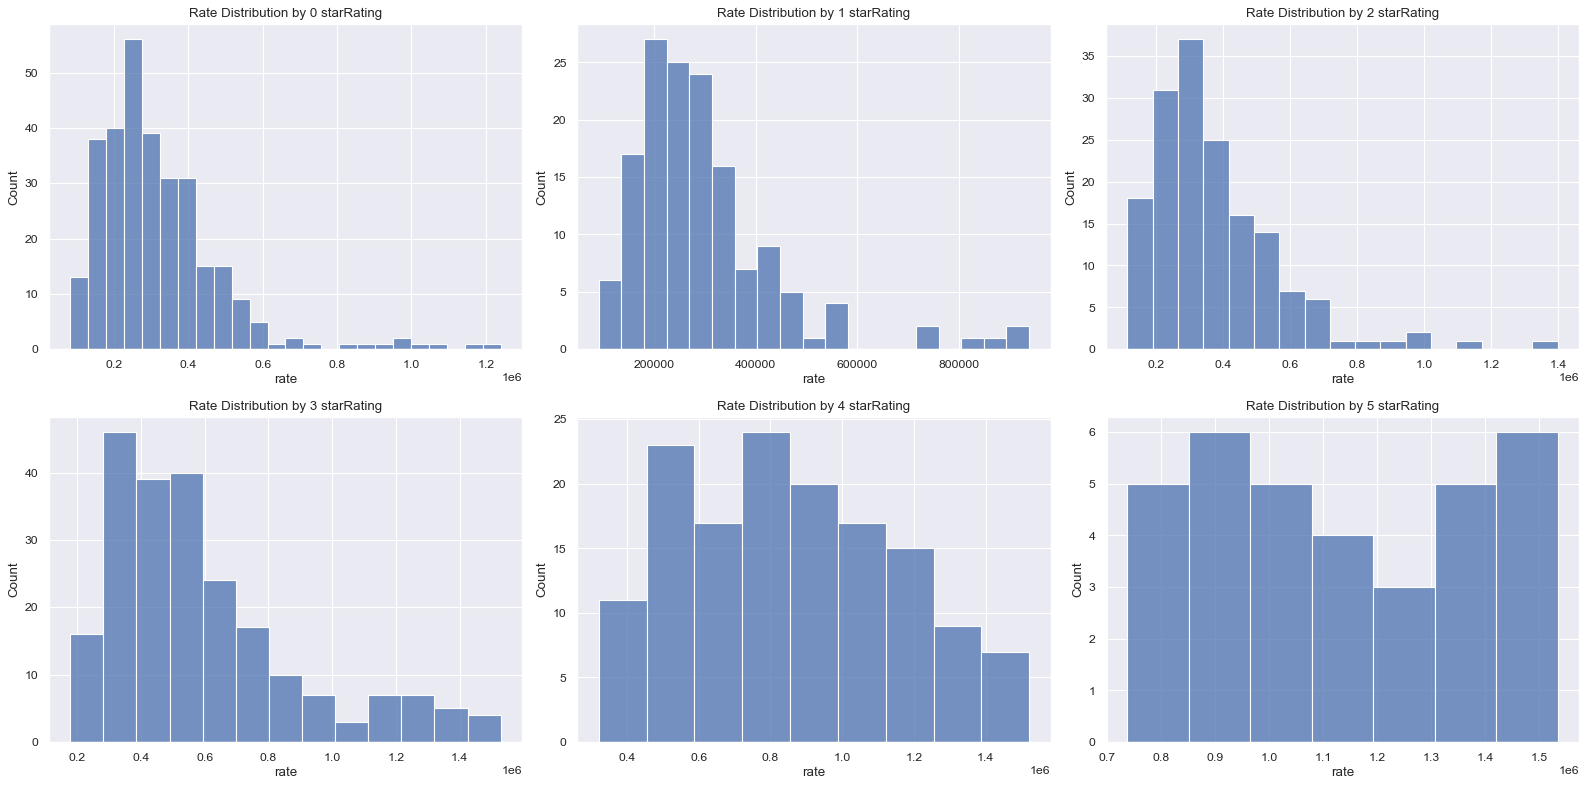

In [60]:
filtered_0 = df[df['starRating'] == 0.0]
filtered_1 = df[df['starRating'] == 1.0]
filtered_2 = df[df['starRating'] == 2.0]
filtered_3 = df[df['starRating'] == 3.0]
filtered_4 = df[df['starRating'] == 4.0]
filtered_5 = df[df['starRating'] == 5.0]

print('Skew value for every starRating')
print(df.groupby('starRating')['rate'].skew())

# OriginalRate Distribution by starRating using hisplot inside subplot
fig, ax = plt.subplots(2, 3, figsize=(20, 10), dpi=80,
                       gridspec_kw={'width_ratios': [1, 1, 1]})
sns.histplot(filtered_0, x="rate", ax=ax[0, 0]).set(
    title='Rate Distribution by 0 starRating')
sns.histplot(filtered_1, x="rate", ax=ax[0, 1]).set(
    title='Rate Distribution by 1 starRating')
sns.histplot(filtered_2, x="rate", ax=ax[0, 2]).set(
    title='Rate Distribution by 2 starRating')
sns.histplot(filtered_3, x="rate", ax=ax[1, 0]).set(
    title='Rate Distribution by 3 starRating')
sns.histplot(filtered_4, x="rate", ax=ax[1, 1]).set(
    title='Rate Distribution by 4 starRating')
sns.histplot(filtered_5, x="rate", ax=ax[1, 2]).set(
    title='Rate Distribution by 5 starRating')
fig.tight_layout()

In [61]:
# Statistik Harga tiap rating bintang hotel

dfRateStat = df.groupby('starRating').agg(
    {'rate': ['mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75)]})

# change the column name from index 4 and 6
dfRateStat = dfRateStat.rename(
    columns={'<lambda_0>': '25%', '<lambda_1>': '75%'})
dfRateStat

rate                                                       \
                    mean            std     min      max       25%     median   
starRating                                                                      
0           3.191067e+05  171570.704430   82645  1239669  206612.0   289256.0   
1           2.972719e+05  149305.342175   90909   938609  206612.0   264463.0   
2           3.785267e+05  195403.723931  114876  1399537  247934.0   329752.0   
3           5.947459e+05  305081.185819  177686  1528926  371901.0   516529.0   
4           8.620919e+05  302233.532163  321395  1521212  613572.5   846281.0   
5           1.127378e+06  247495.951682  736969  1534866  909555.0  1103609.0   

                       
                  75%  
starRating             
0            371901.0  
1            330579.0  
2            455988.0  
3            709703.0  
4           1102204.0  
5           1368749.0

- Pada kota Yogyakarta tidak terdapat banyak hotel bintang 5.
- Mayoritas hotel di Yogyakarta adalah hotel bintang 0.
- Terdapat hotel bintang 2 yang memiliki harga setara dengan hotel bintang 5.

> Dari tabel statistik tersebut mengindikasikan beberapa nilai yang tidak wajar. Untuk penelitian selanjutnya bisa dilakukan pembersihan data lebih mendalam lagi.

> Hasil dari *`multi-hot encoding`* juga belum dilakukan `pembersihan data`, selain itu dengan banyaknya hasil kolom juga dapat dilakukan reduksi dimensi, contohnya menggunakan `PCA`. Oleh karena itu untuk penelitian selanjutnya bisa dilakukan pembersihan data lebih mendalam lagi dan dilakukan reduksi dimensi.

Masih banyak informasi-informasi yang dapat di ambil dari data ini, seperti:
- Perbandingan harga hotel bintang 5 dengan hotel bintang 0.
- Landmark apa yang paling banyak dicari oleh pengunjung hotel?
- Fasilitas apa yang sudah manjadi standar pada hotel bintang 3?
- Dan masih banyak lagi.